# Data investigation

In [8]:
import pandas as pd
import matplotlib as plot

Have a peak at the two data files


In [9]:
!ls 'Data/Activity4.4datasets/'

QQ223.csv  QQ224.csv


In [10]:
!head 'Data/Activity4.4datasets/QQ223.csv'
!head 'Data/Activity4.4datasets/QQ224.csv'

QQ233,
Student,Mark
P231,58
P452,34
Q2314,3
P21,55
P6573,59
R233,61
R234,55
Q211,14
QQ224,
Student,Mark
P231,66
P452,64
Q2314,5
P21,56
P6573,79
R233,59
R234,50
Q211,19


In [13]:
QQ223_df = pd.read_csv('Data/Activity4.4datasets/QQ223.csv', header=1)
QQ223_df[:5]

,Student,Mark
0,P231,58
1,P452,34
2,Q2314,3
3,P21,55
4,P6573,59


In [14]:
QQ224_df = pd.read_csv('Data/Activity4.4datasets/QQ224.csv', header=1)
QQ224_df[:5]

,Student,Mark
0,P231,66
1,P452,64
2,Q2314,5
3,P21,56
4,P6573,79


## Calculate the required statistics for the question
Calculate the Maximum, Minimum, Mean and Median marks

In [18]:
# Maximum
QQ223_df['Mark'].max()

89

In [19]:
# Minimum
QQ223_df['Mark'].min()

3

In [20]:
# Mean
QQ223_df['Mark'].mean()

44.5625

In [22]:
# median
QQ223_df['Mark'].median()

54.5

In [23]:
# Maximum
QQ224_df['Mark'].max()

99

In [24]:
# Minimum
QQ224_df['Mark'].min()

4

In [25]:
# Mean
QQ224_df['Mark'].mean()

58.0625

In [26]:
# median
QQ224_df['Mark'].median()

62.5

## Use the describe method to get some general stats

In [27]:
QQ223_df.describe()

,Mark
count,16.000000
mean,44.562500
std,22.864729
min,3.000000
25%,33.000000
50%,54.500000
75%,59.000000
max,89.000000


In [28]:
QQ224_df.describe()

,Mark
count,16.000000
mean,58.062500
std,28.100934
min,4.000000
25%,54.500000
50%,62.500000
75%,70.000000
max,99.000000


### Observations
The 25%, 50% and 75% figures (the mark value of the population have a lower score, ... 75% are lower, etc) suggest a skewed distribution of marks between the two modules.  QQ224 students generally are performing better.

(We will check this with a simple histogram plot later).

## The activity text hints that plotting the two sets of data might be useful.

To do that it would be easier to put the students and two sets of marks into a single table.  

Giving MORE data about the student.  So, we want to join the two datasets using the common 'Student' column as key.

In [33]:
# rename one of the mark columns to avoid name clash
QQ224_df.columns = ['Student', 'Mark2']
QQ224_df[:5]

,Student,Mark2
0,P231,66
1,P452,64
2,Q2314,5
3,P21,56
4,P6573,79


In [35]:
# join the two datasets together so that each student has data in a single row
combined_df = pd.merge(QQ223_df, QQ224_df, on=['Student'])
combined_df.columns = ['Student', 'QQ223', 'QQ224']
combined_df[:5]


,Student,QQ223,QQ224
0,P231,58,66
1,P452,34,64
2,Q2314,3,5
3,P21,55,56
4,P6573,59,79


### Observations
The datasets look like they have no rows that aren't matched in the other dataset: every student does both modules.  If we weren't sure there was a mark for each student in each original dataset we would use an outer join.


_note to self_ a quick check is that both __datasets had 16 rows__ and __16 in the result__.  So, no need for an outer join

## Now we have a data frame with one student per row, we can visually explore the data with some simple plot()s

Some suggestions are:

 - a simple scatter plot of the two marks
 - a simple bar chart showing both marks for each student
 - try sorting on different values, before plotting the bar charts


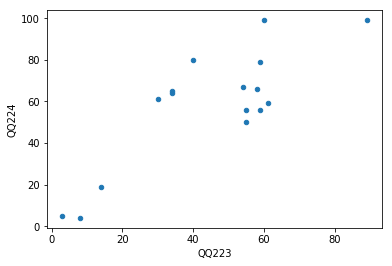

In [36]:
combined_df.plot.scatter(x='QQ223', y='QQ224')

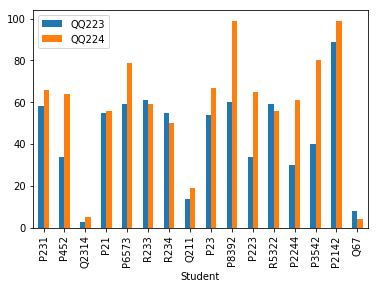

In [37]:
combined_df.plot.bar(x='Student')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fe852ef8a58>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7fe84a485e48>], dtype=object)

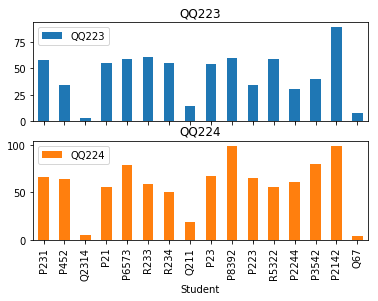

In [39]:
# does it help to split out the two mark sets into different subplots?
combined_df.plot.bar(x='Student', subplots=True)

Doesn't look like much of an improvement.

*Note to self:* The above y values are different

left to itself, each subplot has a different range on the the y-axis.  setting `ylim` should help that.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fe84a2a7ac8>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7fe84a2e5780>], dtype=object)

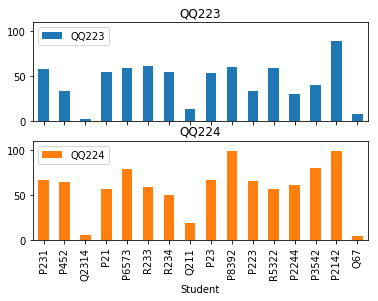

In [42]:
combined_df.plot.bar(x='Student', subplots=True, ylim=(0,110))

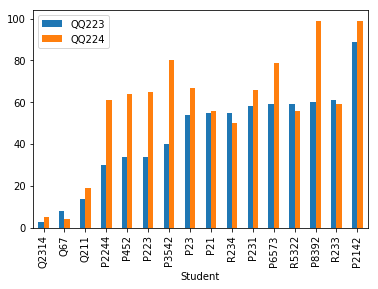

In [43]:
# let's try sorting the original bar chart on different values
combined_df.sort_values(by=['QQ223']).plot.bar(x='Student')

### Observations

There's a group of P students performing below the pass mark on the QQ223 module, but doing much better on the QQ224 module.  They seem to stand out a bit as a group.  All the Q students are at the lower end of the performance for the QQ223 module

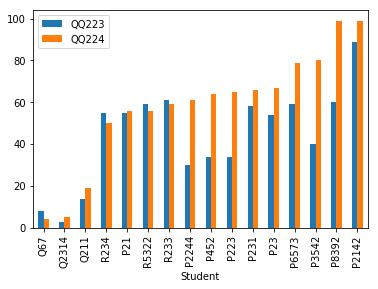

In [44]:
# sort by QQ24 mark
combined_df.sort_values(by=['QQ224']).plot.bar(x='Student')


### Observations

The notable P group has lost a member, but there are still three that look unusual in the middle range.  The Q students are also at the lower end of the performance for the Mark2 module.


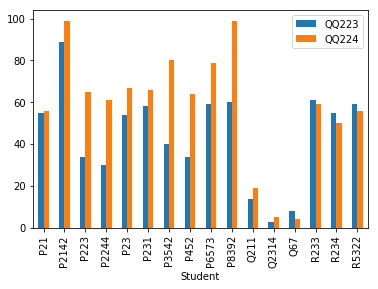

In [45]:
# lets sort by student
combined_df.sort_values(by=['Student']).plot.bar(x='Student')

### Obsrevations

Q students are doing very badly on both modules.

P students are doing better in QQ224 than QQ223.

The R students are doing slightly better in QQ223 than QQ224
 

### Extended scatter plot

I wonder if the performace difference show on the scatter diagram.  Lets add a fourth column with the first letter of the student number.  Then use this to colour the scatter plot.

__note to self:__

The 'c' column in a scatter diagram needs to be numeric.  So we will use the ordinal/unicode value of the first letter generated using `ord()`

In [48]:
# make a series of the ordinal values of each student first letter
letter_series = pd.Series(ord(i[0]) for i in combined_df['Student'])
combined_df['Letter'] = letter_series
combined_df[:5]

,Student,QQ223,QQ224,Letter
0,P231,58,66,80
1,P452,34,64,80
2,Q2314,3,5,81
3,P21,55,56,80
4,P6573,59,79,80


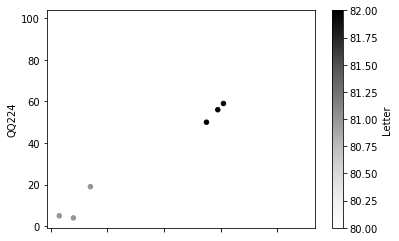

In [49]:
# plot the scatter diagram
combined_df.plot.scatter(x='QQ223', y='QQ224', c='Letter')

### Observations

The sample i stoo small to draw any conclusions from the colouring.  Q students are clearly clustered 'low' on x and y.  The R and P students showing less evidence of strict clustering.

It's not clear if this is just a small sample bias, or something a bigger population would reinforce.

_note the observation and move on_

### Checking the apparent skewed distributions

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fe847cc4160>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7fe847c399e8>], dtype=object)

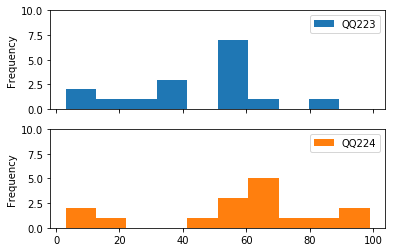

In [51]:
combined_df.plot.hist(x='Student', y=['QQ223', 'QQ224'],
                     ylim=(0,10), subplots=True)

### Observations

Again, this is a small sample size with some bins only having a single data element in them.  However, the QQ224 histogram shows more students at the higher marks than the QQ223 histogram.


In [66]:
# summary stats
qq223_stats = {'Max': [QQ223_df['Mark'].max(), QQ224_df['Mark2'].max()],
              'Min': [QQ223_df['Mark'].min(),QQ224_df['Mark2'].min()],
              'Mean': [QQ223_df['Mark'].mean(),QQ224_df['Mark2'].mean()],
              'Median': [QQ223_df['Mark'].median(), QQ224_df['Mark2'].median()]
              }
summary_df = pd.DataFrame(qq223_stats, index=['QQ223', 'QQ224'])
summary_df[['Max', 'Min', 'Mean', 'Median']]

,Max,Min,Mean,Median
QQ223,89,3,44.5625,54.5
QQ224,99,4,58.0625,62.5


The stats suggest that students generally perform better on QQ224.  This is reinforced by the histogram plots, showing QQ224 results skewed toward the higher end.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fe84765e0f0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7fe846f112e8>], dtype=object)

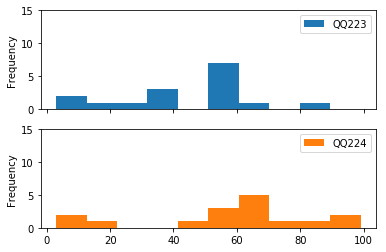

In [67]:
combined_df.plot.hist(x='Student', y=['QQ223','QQ224'], ylim=(0,15), subplots=True)

Sorting the data by student number indicate a difference in sub-groups, based on the initial letter of their student number.  Q students perform poorly on both modules with P and R students showing slight differences in performance patterns.


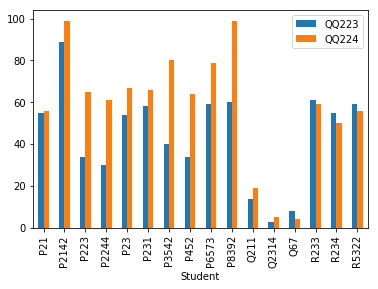

In [68]:
combined_df.sort_values(by=['Student']).plot.bar(x='Student', y=['QQ223','QQ224'])

### Warning

Any conclusions are hampered by the small size of the datasets, but the significance of the student number allocation is probably worth exploring further.

## Summary
This is a very quick descriptive analysis of two dat